# Regresión logistica

Ayuda a clasificar los registros en categorias. Sirve para variables discretas.

Predecir si un cliente aleatorio que entra en la tienda va a comprar un producto en particular basandonos en sus ingresos, géneros, historial de compras, etc.

**Regresión lineal**

\begin{equation}
y = \alpha + \beta x
\end{equation}

![|0.1](../img/Linear_regression.svg.png)

**Regresión logística**

\begin{equation}
y = \frac{1}{1+e^{-(\alpha+\beta x)}}
\end{equation}

![](../img/Funcion-Logistica.jpg)

## matemáticas tras la regresión logística
#### Tablas de contingencia

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv('../datasets/gender-purchase/Gender Purchase.csv')
df.head()

,Gender,Purchase
0,Female,Yes
1,Female,Yes
2,Female,No
3,Male,No
4,Male,Yes


In [7]:
df.shape

(511, 2)

Ahora, utilizaremos las tablas de contingencia para evidenciar las frecuencias de repetición de alguna convinación de estas categorias. Utilizaremos el método **crosstab** para este proposito.

In [8]:
tabla_contingencia = pd.crosstab(df['Gender'], df['Purchase'])
tabla_contingencia

Purchase,No,Yes
Gender,,
Female,106,159
Male,125,121


Ahora, podemos totalizar cada una de las categorias de añadiendo una columna sobre el objeto que se creó previamente.

Podemos adicionalmente, transformar la tabla de contingencias para que nos proporciones el porcentaje de participacion de cada una de las frecuencias acumuladas, con respecto al total. Incialmente, debemos utilizar el método **astype** para trabajar con valores de tipo florante, y con el método div, realizar la división de la categoría sobre el total.

In [9]:
tabla_contingencia.astype('float').div(tabla_contingencia.sum(axis=1), axis=0)

Purchase,No,Yes
Gender,,
Female,0.40000,0.60000
Male,0.50813,0.49187


## Probabilidad condicional

Define la probabilidad de ocurrencia de un evento aleatorio, dadas unas condiciones previas conocidas con certeza de su ocurrencia o no ocurrencia.

* Cuál es la probabilidad de que un cliente compre un producto si es hombre?
* Cuál es la probabilidd de que saviendo que un cliente compra un producto, esta sea mujer?

In [10]:
from IPython.display import display, Math, Latex

**Primera pregunta de investigación**

$$P(compra|hombre) = \frac{Numero~ total~ de~ compras~ hechas~ por~ hombres~}{Numero~ total~ de~ hombres~ de~ la~ muestra~} = \frac{comprar \cap hombre}{hombre}$$


In [11]:
121/246

0.491869918699187

**Segunda pregunta de investigación**

$$P(mujer|compra) = \frac{Numero~ total~ de~ compras~ hechas~ por~ mujeres~}{Numero~ total~ de~ compras} = \frac{mujer \cap compra}{compra}$$

In [12]:
159/280

0.5678571428571428

## Ratio de probabilidades
Cociente entre los casos de éxito sobre los de fracaso en el suceso estudiado para cada grupo

$$ P_m = probabilidad ~de ~compras ~hechas ~por ~hombres$$
$$ P_f = probabilidad ~de ~compras ~hechas ~por ~mujeres$$
$$ odds_{compre|hombre} = \frac{P_m}{1-P_m}$$
$$ odds_{compre|hombre} = \frac{P_f}{1-P_f}$$

In [13]:
pm = 121/246
pf = 159/265

odds_m = pm/(1-pm)
odds_f = pf/(1-pf)
print(odds_f, odds_m)

1.4999999999999998 0.9680000000000002


# Implementación del método de la máxima verosimilitud para la regresión lineal

## Defir la función de entorno L(b)

$$ L(\beta) = \sum_{i=1}^n P_i^{y_i} (1-P_i)^{y_i} $$

In [14]:
def funcionEntorno(y, pi):
    import numpy as np
    total_sum = 1
    sum_in = list(range(1, len(y)+1))

    for i in range(len(y)):
        sum_in[i] = np.where(y[i] == 1, pi[i], 1-pi[i])
        total_sum = total_sum*sum_in[i]
    return total_sum

### Calcular las probabilidades para cada observación

$$ P_i = P(x_i) = \frac{1}{1 + e^{-\beta\cdot x_i}}$$

In [15]:
def probLogisticas(X, beta):
    import numpy as np
    n_row = np.shape(X)[0]
    n_col = np.shape(X)[1]
    pi = list(range(1, n_row+1))
    expon = list(range(1, n_row+1))
    for i in range(n_row):
        expon[i] = 0
        for j in range(n_col):
            ex = X[i][j] * beta[j]
            expon[i] = ex + expon[i]
        with np.errstate(divide="ignore", invalid="ignore"):
            pi[i] = 1/(1+np.exp(-expon[i]))
    return pi

### Calcular la matriz diagonal W

$$ W = diag(P_i \cdot (1-P_i))_{i=1}^n$$

In [16]:
def findW(pi):
    import numpy as np
    n = len(pi)

    W = np.zeros(n*n).reshape(n,n)
    for i in range(n):
        print(i)
        W[i,i] = pi[i]*(1-pi[i])
        W[i,i].astype('float')
    return W


### Obtener la solución de la función logistica

#### metodo de newton rapson

$$x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$$

In [17]:
def logistic(X, Y, limit):
    import numpy as np
    from numpy import linalg

    n_row = np.shape(X)[0]
    bias = np.ones(n_row).reshape(n_row, 1)
    X_new = np.append(X, bias, axis=1)
    ncol = np.shape(X_new)[1]
    beta = np.zeros(ncol).reshape(ncol, 1)
    root_dif = np.array(range(1, ncol+1)).reshape(ncol, 1)
    iter_i = 10000

    while (iter_i > limit):
        print(str(iter_i)+","+str(limit))
        pi = probLogisticas(X_new, beta)
        print(pi)
        W = findW(pi)
        print(W)
        numerato = (np.transpose(np.matrix(X_new))*np.matrix(Y - np.transpose(pi)).transpose())
        denominator = np.matrix(np.transpose(X_new)*np.matrix(W)*np.matrix(X_new))
        root_dif = np.array(linalg.inv(denominator)*numerato)
        beta = beta + root_dif
        print(beta)
        iter_i = np.sum(root_dif*root_dif)
        print(iter_i)
        ll = funcionEntorno(Y, pi)
    return beta


## comprobacion experimental

In [18]:
import numpy as np


In [19]:
X = np.array(range(10)).reshape(10,1)
X

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [20]:
Y = [0, 0, 0, 0, 1, 0, 1,0,1,1]

In [21]:
bais = np.ones(10).reshape(10,1)
X_new = np.append(X, bais, axis=1)
X_new

array([[0., 1.],
       [1., 1.],
       [2., 1.],
       [3., 1.],
       [4., 1.],
       [5., 1.],
       [6., 1.],
       [7., 1.],
       [8., 1.],
       [9., 1.]])

In [22]:
a = logistic(X, Y, 0.00001)

10000,1e-05
[array([0.5]), array([0.5]), array([0.5]), array([0.5]), array([0.5]), array([0.5]), array([0.5]), array([0.5]), array([0.5]), array([0.5])]
0
1
2
3
4
5
6
7
8
9
[[0.25 0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.25 0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.25 0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.25 0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.25 0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.25 0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.25 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.25 0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.25 0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.25]]
[[ 0.43636364]
 [-2.36363636]]
5.777190082644626
5.777190082644626,1e-05
[array([0.08598797]), array([0.12705276]), array([0.18378532]), array([0.2583532]), array([0.35019508]), array([0.45467026]), array([0.56329497]), array([0.66616913]), array([0.75533524]), array([0.82687453])]
0
1
2
3
4
5
6

In [23]:
ll = funcionEntorno(Y, probLogisticas(X, a))
ll

array([1.32622426e-06])

In [24]:
Y = 0.66220827 * X - 3.69557172

# Con el paquete stats de python

In [25]:
import statsmodels.api as sm

In [26]:
logistic_model = sm.Logit(Y, X_new)

ValueError: endog must be in the unit interval.

# Implementación de la regresión logística para predicciones bancarias

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
data = pd.read_csv('../datasets/bank/bank.csv', sep=";")
data.sample(20)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
450,73,retired,married,university.degree,no,yes,no,cellular,mar,fri,...,1,999,0,nonexistent,-1.8,92.843,-50.0,1.531,5099.1,yes
2486,60,blue-collar,married,professional.course,no,no,no,telephone,may,tue,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1711,36,technician,married,professional.course,no,no,yes,telephone,jun,thu,...,2,999,0,nonexistent,1.4,94.465,-41.8,4.958,5228.1,no
1208,35,admin.,married,high.school,unknown,unknown,unknown,telephone,may,wed,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,no
1913,53,self-employed,married,university.degree,no,yes,no,telephone,jun,tue,...,4,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1,no
3442,32,admin.,single,university.degree,no,yes,no,cellular,jul,thu,...,2,6,1,success,-1.7,94.215,-40.3,0.846,4991.6,no
2541,34,blue-collar,married,basic.9y,unknown,yes,no,telephone,jun,thu,...,4,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,no
3353,37,admin.,divorced,university.degree,no,yes,yes,cellular,aug,tue,...,2,999,0,nonexistent,1.4,93.444,-36.1,4.968,5228.1,no
3170,33,technician,single,professional.course,no,yes,no,cellular,may,wed,...,2,999,2,failure,-1.8,92.893,-46.2,1.334,5099.1,yes
1141,55,admin.,married,professional.course,no,yes,yes,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.968,5228.1,no


El dataset cuenta con información bancaria sobre potenciales clientes que adquirieron algún tipo de producto del banco, con ciertas variables de analisis de tipo categóricas como continuas.

In [ ]:
data.shape

(4119, 21)

In [ ]:
data.columns.values.tolist()

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

Nos fijaremos en la columna "y", que cuenta con información del cierre de una venta de alguno de los productos del banco. En este caso, la columna cuenta con valores booleanos en formato string. Lo que haremos a continuación será reemplazar esos valores tipo texto, con un formato entero de 1 y 0.

In [ ]:
data["y"] = (data["y"]=="yes").astype(int)
data.sample(20)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1917,39,admin.,married,basic.6y,unknown,no,no,cellular,jul,wed,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,1
1461,45,blue-collar,divorced,high.school,unknown,no,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,0
2556,57,retired,married,university.degree,no,yes,no,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,0
1875,39,technician,single,university.degree,no,no,no,cellular,aug,wed,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.967,5228.1,0
3370,41,management,married,high.school,unknown,yes,no,cellular,may,tue,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.291,5099.1,0
2979,39,entrepreneur,married,university.degree,no,yes,no,cellular,nov,thu,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.076,5195.8,0
3596,37,admin.,single,university.degree,no,no,no,cellular,oct,fri,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.720,5017.5,1
2226,44,housemaid,married,basic.4y,unknown,no,no,telephone,jun,thu,...,2,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
2820,24,blue-collar,single,unknown,no,no,no,cellular,jul,tue,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,0
2547,34,services,unknown,high.school,no,yes,yes,cellular,may,tue,...,2,999,1,failure,-1.8,92.893,-46.2,1.344,5099.1,0


Adicionalmente, la columna educación puede ser una variable influyente a la hora de tomas la decisión de adquirir o no un producto. Por lo tanto, procederemos a realizar el analisis de la composición de la variable "education", y sus respectivos valores unicos.

In [ ]:
data.education.unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

Podemos observar algunas clasificaciones que podrian consolidarse en una única categoria, como es el caso de los años cursados de la educación básica. Por otro lado, unificaremos los formatos de texto, capitalizando las iniciales de las palabras y estableciendo como separador entre palabras el espacio en lugar del punto.

In [ ]:
data.education = np.where(data.education == "basic.4y", "Basic", data.education)
data.education = np.where(data.education == "basic.6y", "Basic", data.education)
data.education = np.where(data.education == "basic.9y", "Basic", data.education)

data.education = np.where(data.education == "high.school", "High School", data.education)
data.education = np.where(data.education == "professional.course", "Professional Course", data.education)
data.education = np.where(data.education == "university.degree", "University Degree", data.education)

data.education = np.where(data.education == "illiterate", "Illiterate", data.education)
data.education = np.where(data.education == "unknown", "Unknown", data.education)

In [ ]:
data.education.unique()

array(['Basic', 'High School', 'University Degree', 'Professional Course',
       'Unknown', 'Illiterate'], dtype=object)

In [ ]:
print(f"Personas que no compraron el producto: {data.y.value_counts()[0]}; Personas que comprarón el producto: {data.y.value_counts()[1]}")

Personas que no compraron el producto: 3668; Personas que comprarón el producto: 451


Ahora, hagamos un analisis exploratorio de los datos numérios con base en la columna "y".

In [ ]:
data.groupby("y").mean()

C:\Users\manuel.pacheco\AppData\Local\Temp\ipykernel_28808\3574081688.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby("y").mean()


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
0,39.895311,219.40976,2.605780,982.763086,0.141767,0.240185,93.599677,-40.586723,3.802826,5175.502072
1,41.889135,560.78714,1.980044,778.722838,0.585366,-1.177384,93.417268,-39.786475,2.145448,5093.118625


In [ ]:
data.groupby("education").mean()

C:\Users\manuel.pacheco\AppData\Local\Temp\ipykernel_28808\3637113592.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby("education").mean()


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
education,,,,,,,,,,,
Basic,42.337124,253.898457,2.429732,978.815597,0.149472,0.237368,93.658600,-41.120552,3.775701,5174.133144,0.079610
High School,38.097720,258.534202,2.630836,958.022801,0.206298,-0.002497,93.564314,-40.995765,3.511732,5163.212595,0.105320
Illiterate,42.000000,146.000000,4.000000,999.000000,0.000000,-2.900000,92.201000,-31.400000,0.834000,5076.200000,0.000000
Professional Course,40.207477,278.816822,2.512150,958.211215,0.194393,0.163925,93.599630,-40.127664,3.701426,5167.595140,0.121495
University Degree,39.017405,247.707278,2.583070,947.900316,0.207278,-0.009731,93.499109,-39.830063,3.547132,5163.023180,0.130538
Unknown,42.826347,267.281437,2.538922,939.700599,0.263473,-0.074251,93.637455,-39.487425,3.410174,5151.260479,0.155689


Text(0, 0.5, 'Frecuencia de compra del producto')

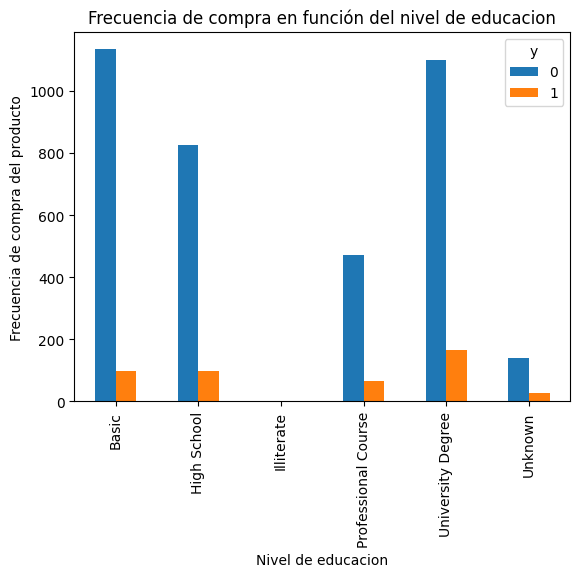

In [ ]:
%matplotlib inline
pd.crosstab(data.education, data.y).plot(kind="bar")
plt.title("Frecuencia de compra en función del nivel de educacion")
plt.xlabel("Nivel de educacion")
plt.ylabel("Frecuencia de compra del producto")

Text(0, 0.5, 'Proporcion de clientes')

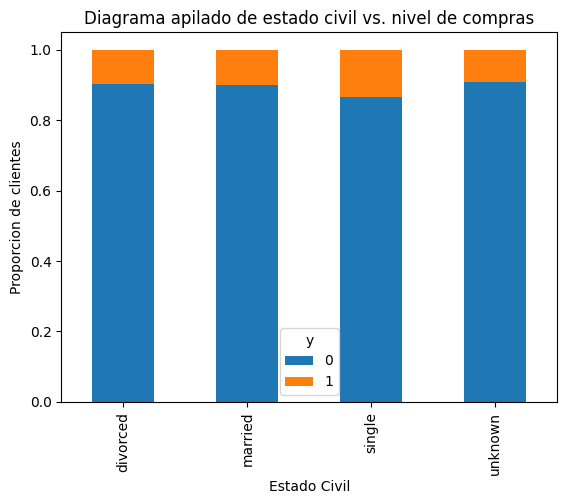

In [ ]:
table =  pd.crosstab(data.marital, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title("Diagrama apilado de estado civil vs. nivel de compras")
plt.xlabel("Estado Civil")
plt.ylabel("Proporcion de clientes")

Text(0, 0.5, 'Frecuencia de compra del producto')

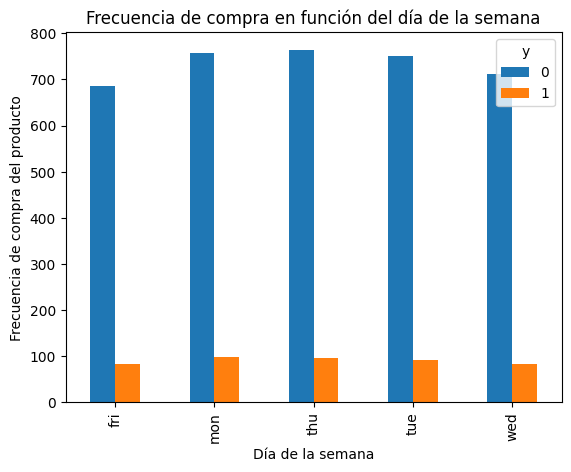

In [ ]:
%matplotlib inline
pd.crosstab(data.day_of_week , data.y).plot(kind="bar")
plt.title("Frecuencia de compra en función del día de la semana")
plt.xlabel("Día de la semana")
plt.ylabel("Frecuencia de compra del producto")

Text(0, 0.5, 'Frecuencia de compra del producto')

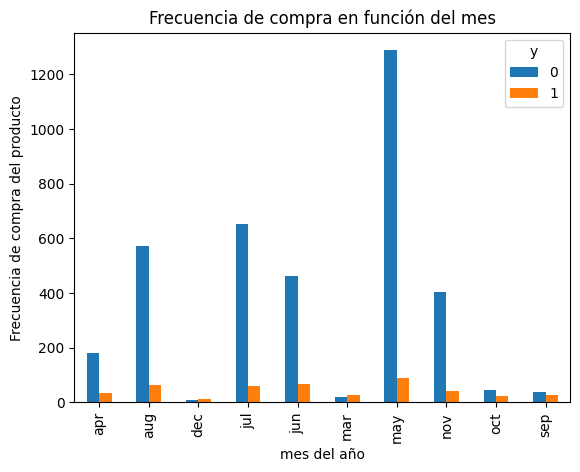

In [ ]:
%matplotlib inline
pd.crosstab(data.month , data.y).plot(kind="bar")
plt.title("Frecuencia de compra en función del mes")
plt.xlabel("mes del año")
plt.ylabel("Frecuencia de compra del producto")

Text(0, 0.5, 'Proporcion de clientes')

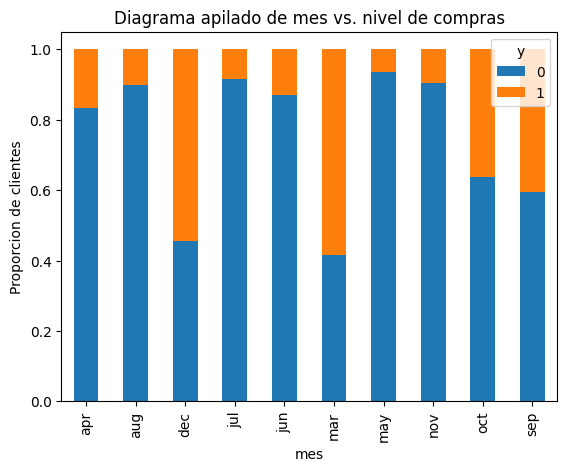

In [ ]:
table =  pd.crosstab(data.month, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title("Diagrama apilado de mes vs. nivel de compras")
plt.xlabel("mes")
plt.ylabel("Proporcion de clientes")

### conversión de variables categóricas a dummies

In [ ]:
def crearDummies(data, columnas):
    '''
    Esta función facilita la creación de variables dummy en un dataset, especificando el dataset y las columnas a convertir

    data: type(DataFrame)
    columnas: type(list), lista de columnas a transformar

    Autor:Manuel Alejandro Pacheco Murcia
    
    '''

    import pandas as pd
    dummy = pd.get_dummies(data[columnas], prefix=columnas)
    data = data.drop(columnas, axis=1)
    data = pd.concat([data, dummy], axis=1)
    return data

In [ ]:
categorias = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", "poutcome"]

In [30]:
df = crearDummies(data, categorias)
df

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,30,487,2,999,0,-1.8,92.893,-46.2,1.313,5099.1,...,0,0,1,0,0,0,0,0,1,0
1,39,346,4,999,0,1.1,93.994,-36.4,4.855,5191.0,...,0,0,1,0,0,0,0,0,1,0
2,25,227,1,999,0,1.4,94.465,-41.8,4.962,5228.1,...,0,0,0,0,0,0,1,0,1,0
3,38,17,3,999,0,1.4,94.465,-41.8,4.959,5228.1,...,0,0,1,0,0,0,0,0,1,0
4,47,58,1,999,0,-0.1,93.200,-42.0,4.191,5195.8,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,53,1,999,0,1.4,93.918,-42.7,4.958,5228.1,...,0,0,0,0,1,0,0,0,1,0
4115,39,219,1,999,0,1.4,93.918,-42.7,4.959,5228.1,...,0,0,1,0,0,0,0,0,1,0
4116,27,64,2,999,1,-1.8,92.893,-46.2,1.354,5099.1,...,0,0,0,1,0,0,0,1,0,0
4117,58,528,1,999,0,1.4,93.444,-36.1,4.966,5228.1,...,0,0,1,0,0,0,0,0,1,0


In [33]:
df.columns.values.tolist()

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'marital_unknown',
 'education_basic.4y',
 'education_basic.6y',
 'education_basic.9y',
 'education_high.school',
 'education_illiterate',
 'education_professional.course',
 'education_university.degree',
 'education_unknown',
 'default_no',
 'default_unknown',
 'default_yes',
 'housing_no',
 'housing_unknown',
 'housing_yes',
 'loan_no',
 'loan_unknown',
 'loan_yes',
 'contact_cellular',
 'contact_telephone',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'day_of_week_fri',


In [34]:
data_limpia = df.columns.values.tolist()
to_keep = [v for v in data_limpia if v not in categorias ]

In [35]:
bank_data = df[to_keep]
bank_data.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'mo

In [36]:
bank_data_vars = bank_data.columns.values.tolist()
Y = ['y']
X = [v for v in bank_data_vars if v not in Y]

## Selección de rasgos para el modelo

In [37]:
n = 12

In [38]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [39]:
modelo = LogisticRegression()

In [42]:
rfe = RFE(modelo, n)
rfe = rfe.fit(bank_data['X'], bank_data['Y'].values.ravel())

TypeError: RFE.__init__() takes 2 positional arguments but 3 were given